In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
from plotly import graph_objs as go
plotly.tools.set_credentials_file(username='sambk17', api_key='Uj0EKSS5mTlt9fameBus')

%matplotlib inline

### Combine DataFrames

In [3]:
home_page = pd.read_csv('home_page_table.csv')
user = pd.read_csv('user_table.csv')
payment = pd.read_csv('payment_page_table.csv')
payment_confirmation = pd.read_csv('payment_confirmation_table.csv')
search = pd.read_csv('search_page_table.csv')

In [4]:
user['date'] = pd.to_datetime(user['date'])

user['day_of_week'] = user['date'].dt.day_name()
user['day_of_month'] = user['date'].dt.day
user['month'] = user['date'].dt.month

In [5]:
user.head(2)

,user_id,date,device,sex,day_of_week,day_of_month,month
0,450007,2015-02-28,Desktop,Female,Saturday,28,2
1,756838,2015-01-13,Desktop,Male,Tuesday,13,1


In [6]:
df = user.merge(home_page, on='user_id', how='left').merge(search, on='user_id', how='left').merge(payment, on='user_id', how='left').merge(payment_confirmation, on='user_id', how='left')
df.columns = ['user_id', 'date', 
              'device', 'sex', 
              'day_of_week','day_of_month',
              'month','home_page',
              'search_page','payment_page',
              'payment_confirmation_page']

In [7]:
d = {'home_page':1, 'search_page':1,'payment_page':1,'payment_confirmation_page':1}
df.replace(d, inplace=True)
df.fillna(value=0,inplace=True)

In [8]:
df[['home_page','search_page','payment_page','payment_confirmation_page']] = df[['home_page','search_page','payment_page','payment_confirmation_page']].astype(int)

In [9]:
df.head(10)

,user_id,date,device,sex,day_of_week,day_of_month,month,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,Saturday,28,2,1,0,0,0
1,756838,2015-01-13,Desktop,Male,Tuesday,13,1,1,0,0,0
2,568983,2015-04-09,Desktop,Male,Thursday,9,4,1,1,0,0
3,190794,2015-02-18,Desktop,Female,Wednesday,18,2,1,1,0,0
4,537909,2015-01-15,Desktop,Male,Thursday,15,1,1,0,0,0
5,993454,2015-03-03,Desktop,Male,Tuesday,3,3,1,0,0,0
6,377150,2015-04-15,Desktop,Female,Wednesday,15,4,1,1,0,0
7,137258,2015-01-27,Mobile,Male,Tuesday,27,1,1,0,0,0
8,608249,2015-04-12,Desktop,Female,Sunday,12,4,1,0,0,0
9,615615,2015-02-24,Mobile,Female,Tuesday,24,2,1,1,0,0


### Visual Insights

In [15]:
#Bar Chart of Each Step
home_count = len(df[df['home_page'] == 1])
search_count = len(df[df['search_page'] == 1])
payment_count = len(df[df['payment_page'] == 1])
payment_confirmation_count = len(df[df['payment_confirmation_page'] == 1])

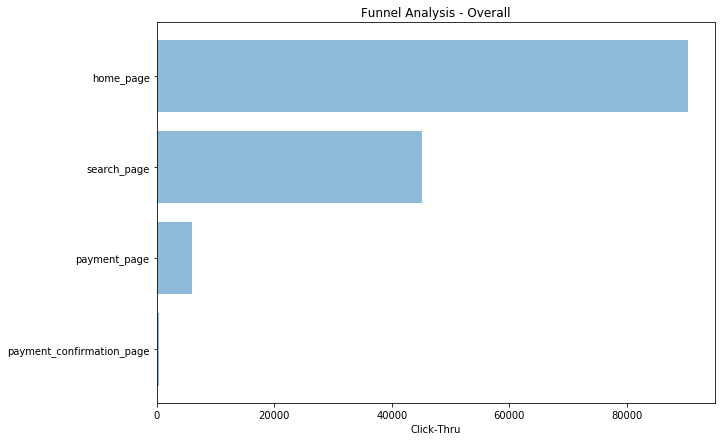

In [21]:
objects = ('home_page', 'search_page', 'payment_page', 'payment_confirmation_page')
y_pos = np.arange(len(objects))
counts = [home_count, search_count, payment_count, payment_confirmation_count][::-1]

fig, ax = plt.subplots(figsize = (10,7))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects[::-1])
plt.xlabel('Click-Thru')
plt.title('Funnel Analysis - Overall')
 
plt.show()

In [32]:
# chart stages data
values = [home_count, search_count, payment_count, payment_confirmation_count]
phases = ['home_page', 'search_page', 'payment_page', 'payment_confirmation_page']

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

In [33]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [34]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

In [35]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### One Hot Encode

* device
* sex
* day_of_week
* day_of month
* month

In [46]:
devices = pd.get_dummies(df['device'], drop_first=True)
sexes = pd.get_dummies(df['sex'], drop_first=True)
days_of_week = pd.get_dummies(df['day_of_week'], drop_first=True)
days_of_month = pd.get_dummies(df['day_of_month'], drop_first=True)
months = pd.get_dummies(df['month'], prefix='month_', drop_first=True)

In [48]:
output = df.drop(labels=['user_id','date','device','sex','day_of_week','day_of_month','month'], axis=1)
userid = df.drop(labels=['date','device','sex','day_of_week','day_of_month','month','home_page','search_page','payment_page','payment_confirmation_page'], axis=1)
inputs = userid.join([devices,sexes, days_of_week, days_of_month, months])